# Basic classification algorithms with Scikit-learn library
### Sofiia Stokop, FB-21mp

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

### 1. Завантажити дані, вивести назви колонок і розмір датасета

In [2]:
df = pd.read_csv("C:\\Users\\100ko\\Jupyter Notebooks\\DA_Labs\\rating\\Video_games_esrb_rating.csv", sep=",", low_memory=False)
df.head()

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [3]:
print('Column names:',list(df.columns))
print('Size:', df.size)
print('Shape:', df.shape)

Column names: ['title', 'console', 'alcohol_reference', 'animated_blood', 'blood', 'blood_and_gore', 'cartoon_violence', 'crude_humor', 'drug_reference', 'fantasy_violence', 'intense_violence', 'language', 'lyrics', 'mature_humor', 'mild_blood', 'mild_cartoon_violence', 'mild_fantasy_violence', 'mild_language', 'mild_lyrics', 'mild_suggestive_themes', 'mild_violence', 'no_descriptors', 'nudity', 'partial_nudity', 'sexual_content', 'sexual_themes', 'simulated_gambling', 'strong_janguage', 'strong_sexual_content', 'suggestive_themes', 'use_of_alcohol', 'use_of_drugs_and_alcohol', 'violence', 'esrb_rating']
Size: 64430
Shape: (1895, 34)


### 2. Опрацювати пропуски

In [4]:
print("Columns with NaN values:", df.columns[df.isna().any()].tolist())
print("Number of NaN values:", df.isnull().sum().sum())

Columns with NaN values: []
Number of NaN values: 0


### 3. Візуалізувати дані

#### Heatmap, що відображає кореляції ознак між собою і з цільовою змінною

In [5]:
df=df.drop([ 'title'], axis = 1)

rat = df['esrb_rating']
rat, unique = pd.factorize(rat)
df['esrb_rating'] = rat

In [6]:
c = df.corr() 
np.fill_diagonal(c.values, np.nan)
c

,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
console,NaN,-0.010502,0.031460,-0.018638,0.074368,0.117672,0.060719,-0.002193,-0.149703,0.014717,...,-0.034284,-0.035514,0.065992,0.063812,0.043566,-0.072237,-0.027630,0.031628,0.010672,-0.026527
alcohol_reference,-0.010502,NaN,0.001153,-0.078723,-0.036286,0.054970,-0.001745,0.009118,-0.075557,0.148086,...,-0.043297,-0.025596,-0.003547,-0.076622,0.007684,-0.001347,0.164599,-0.029137,-0.040217,-0.021947
animated_blood,0.031460,0.001153,NaN,-0.054686,-0.038232,-0.014202,-0.000764,0.154219,-0.027989,0.094402,...,-0.018967,-0.024862,-0.026972,-0.020440,-0.019415,-0.036753,0.072105,0.029670,0.017046,0.029284
blood,-0.018638,-0.078723,-0.054686,NaN,-0.206437,-0.067592,-0.080343,-0.041479,-0.173801,0.089358,...,0.084194,0.071050,0.105880,0.291957,-0.037207,0.090421,-0.038687,-0.018533,0.007284,0.420497
blood_and_gore,0.074368,-0.036286,-0.038232,-0.206437,NaN,-0.042122,-0.027978,0.118566,-0.171432,0.289246,...,0.138011,0.124611,0.012603,0.220318,0.336910,-0.025282,-0.009979,0.053693,0.063320,0.164055
cartoon_violence,0.117672,0.054970,-0.014202,-0.067592,-0.042122,NaN,-0.017009,0.014797,-0.075072,-0.051667,...,-0.026596,0.030661,-0.022569,-0.051667,-0.027225,0.007645,0.043213,0.012657,-0.036855,0.024950
crude_humor,0.060719,-0.001745,-0.000764,-0.080343,-0.027978,-0.017009,NaN,-0.045542,-0.077018,0.085252,...,-0.032395,-0.029236,0.317392,-0.066149,0.016318,-0.029767,-0.011759,-0.030407,-0.005491,0.134518
drug_reference,-0.002193,0.009118,0.154219,-0.041479,0.118566,0.014797,-0.045542,NaN,-0.101056,0.019599,...,0.027456,0.089050,0.064191,0.162238,0.071671,0.037812,-0.024093,-0.024093,-0.002522,0.083606
fantasy_violence,-0.149703,-0.075557,-0.027989,-0.173801,-0.171432,-0.075072,-0.077018,-0.101056,NaN,-0.167181,...,-0.044318,-0.038499,-0.040787,-0.072573,-0.054735,0.082195,0.003901,0.003901,-0.086881,-0.012567
intense_violence,0.014717,0.148086,0.094402,0.089358,0.289246,-0.051667,0.085252,0.019599,-0.167181,NaN,...,0.002844,0.021872,0.006457,0.098834,0.386323,-0.006898,0.058322,0.005943,-0.008710,0.140332


<AxesSubplot:>

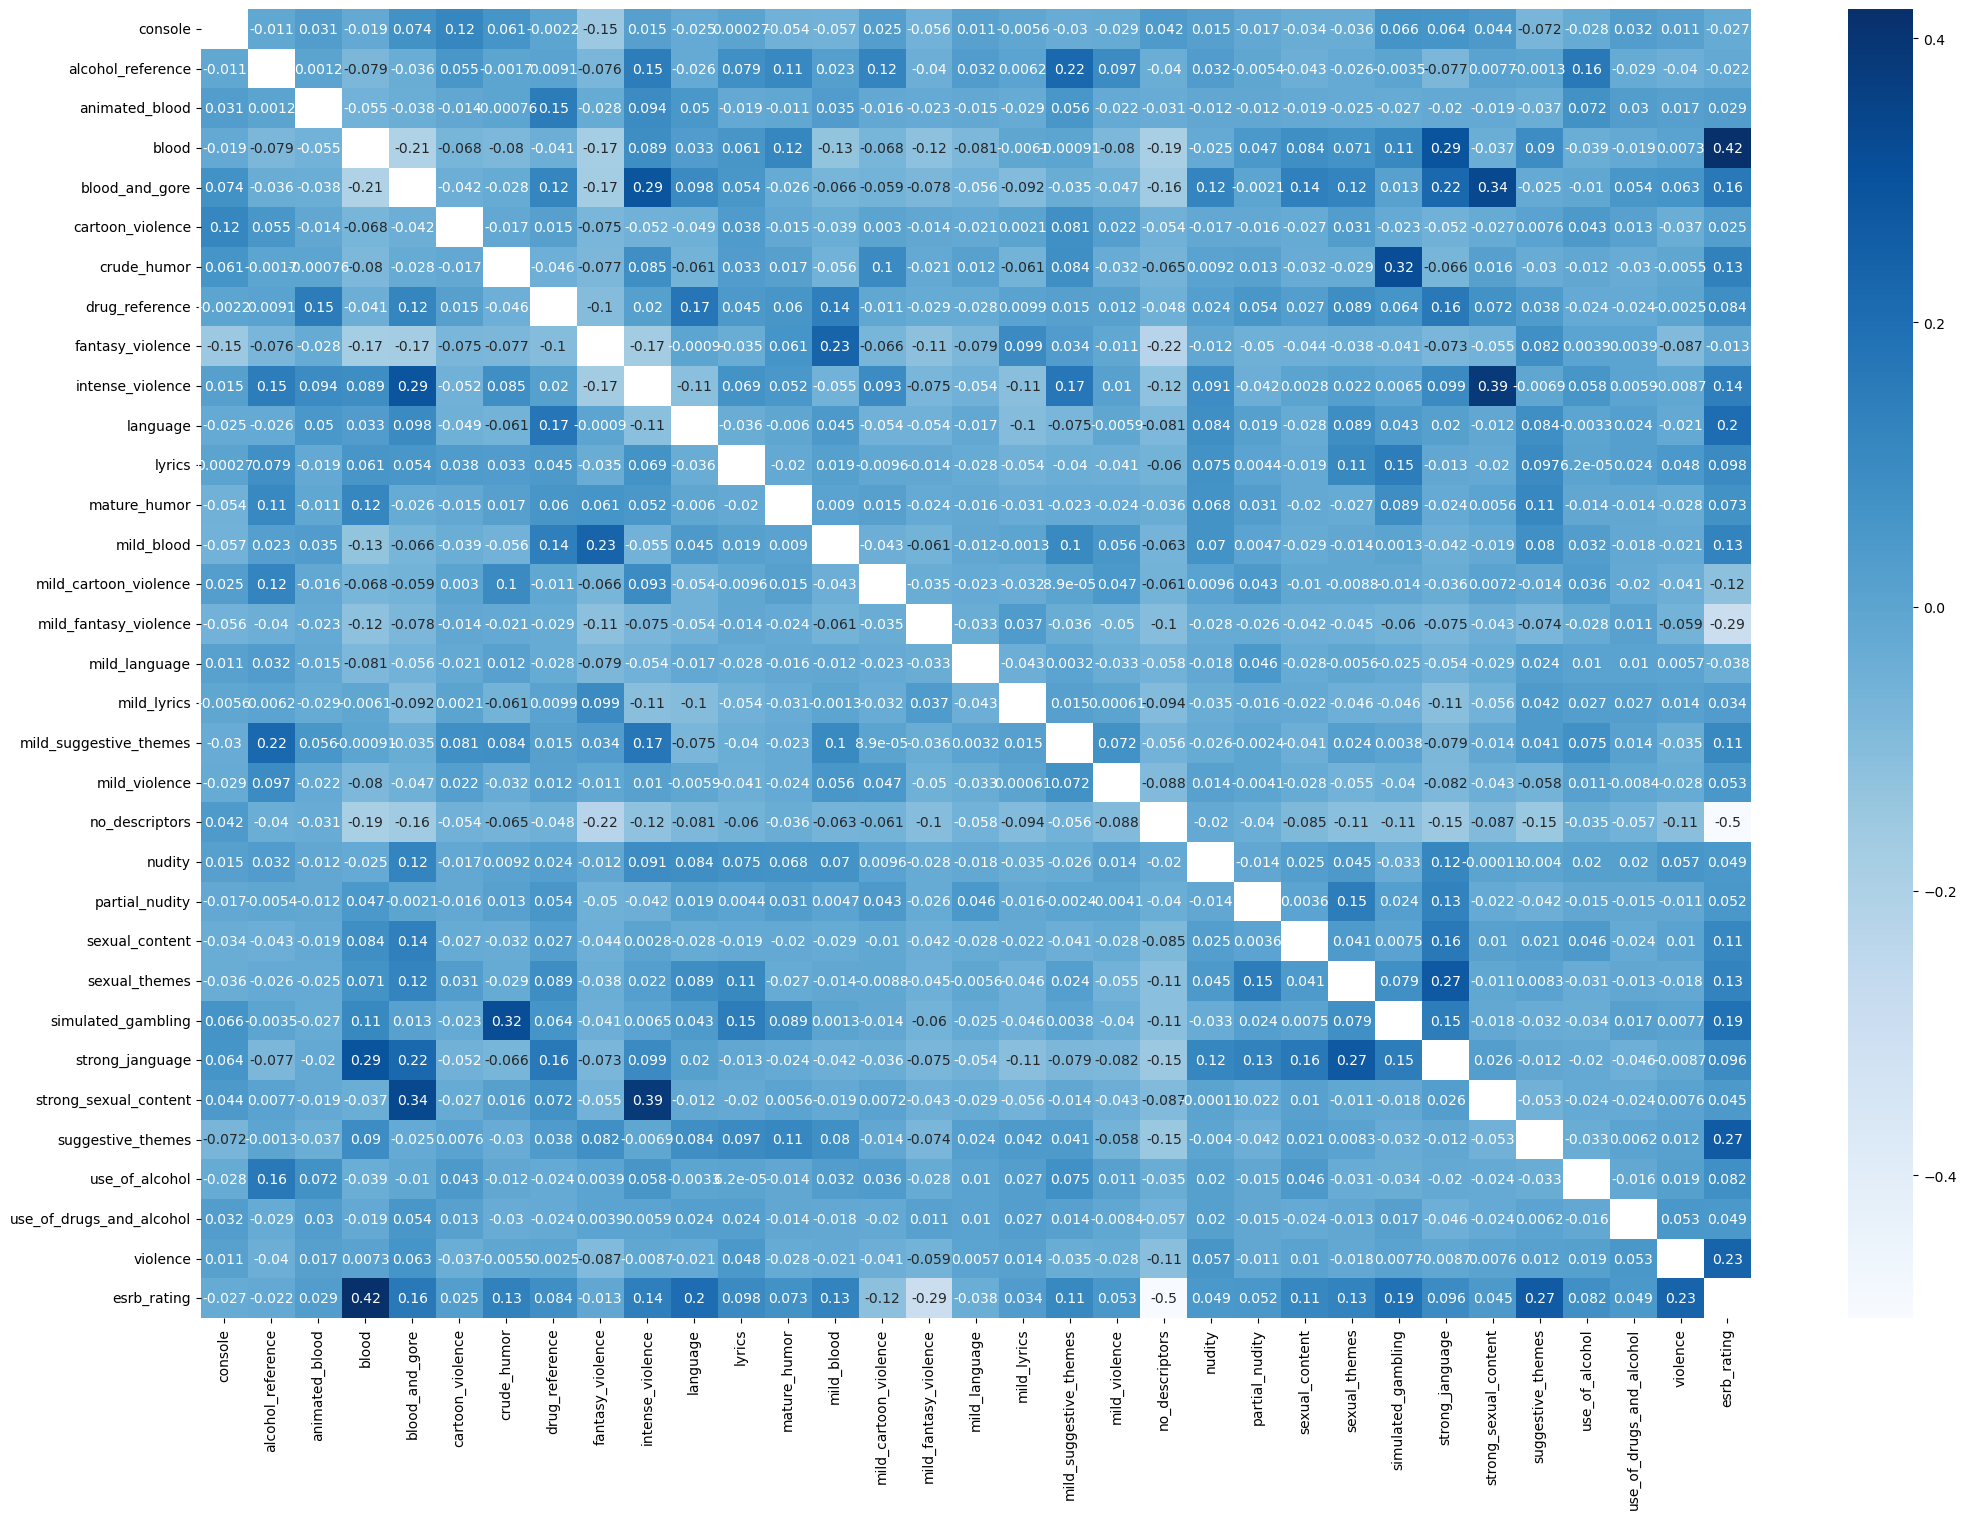

In [7]:
plt.figure(figsize = (25,17))
sns.heatmap(c, annot=True, cmap="Blues")

#### Boxplot-и ознак відносно цільової змінної

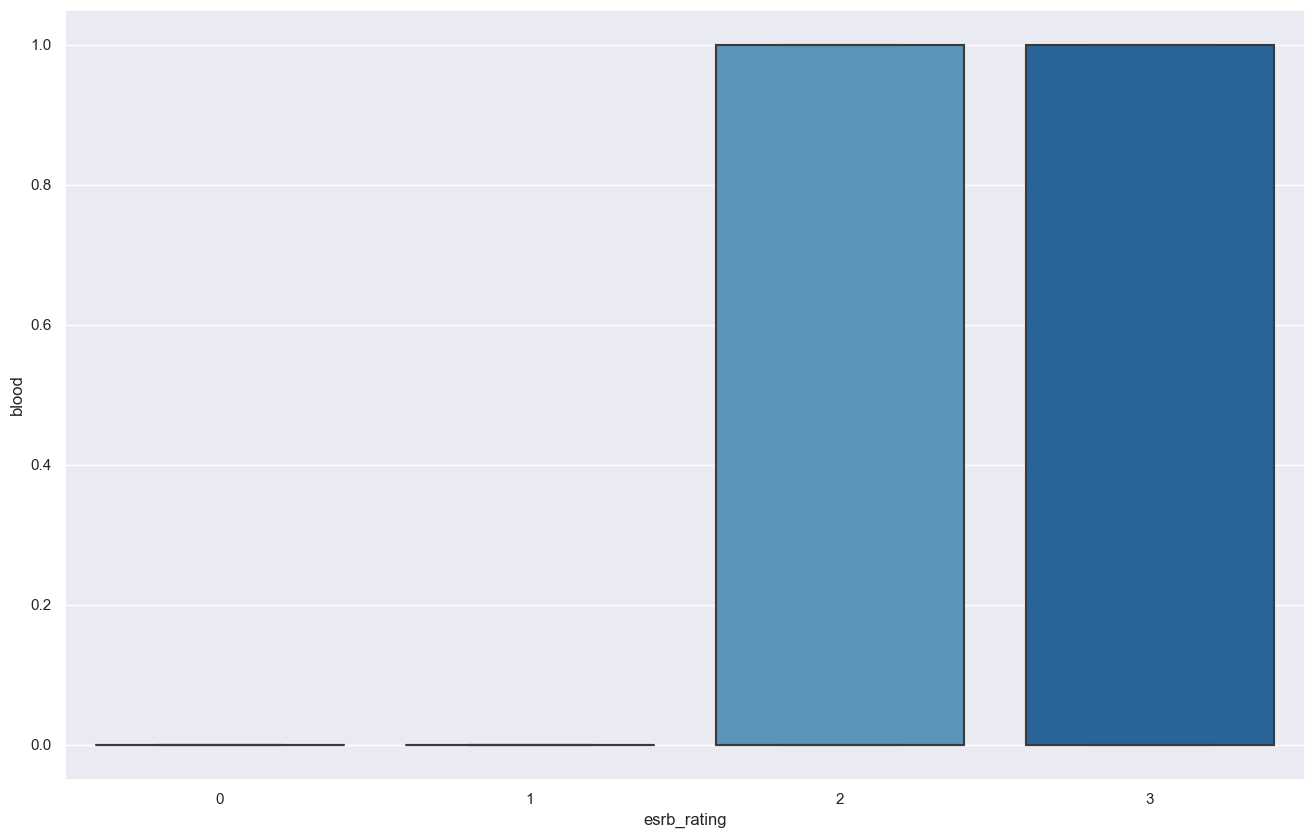

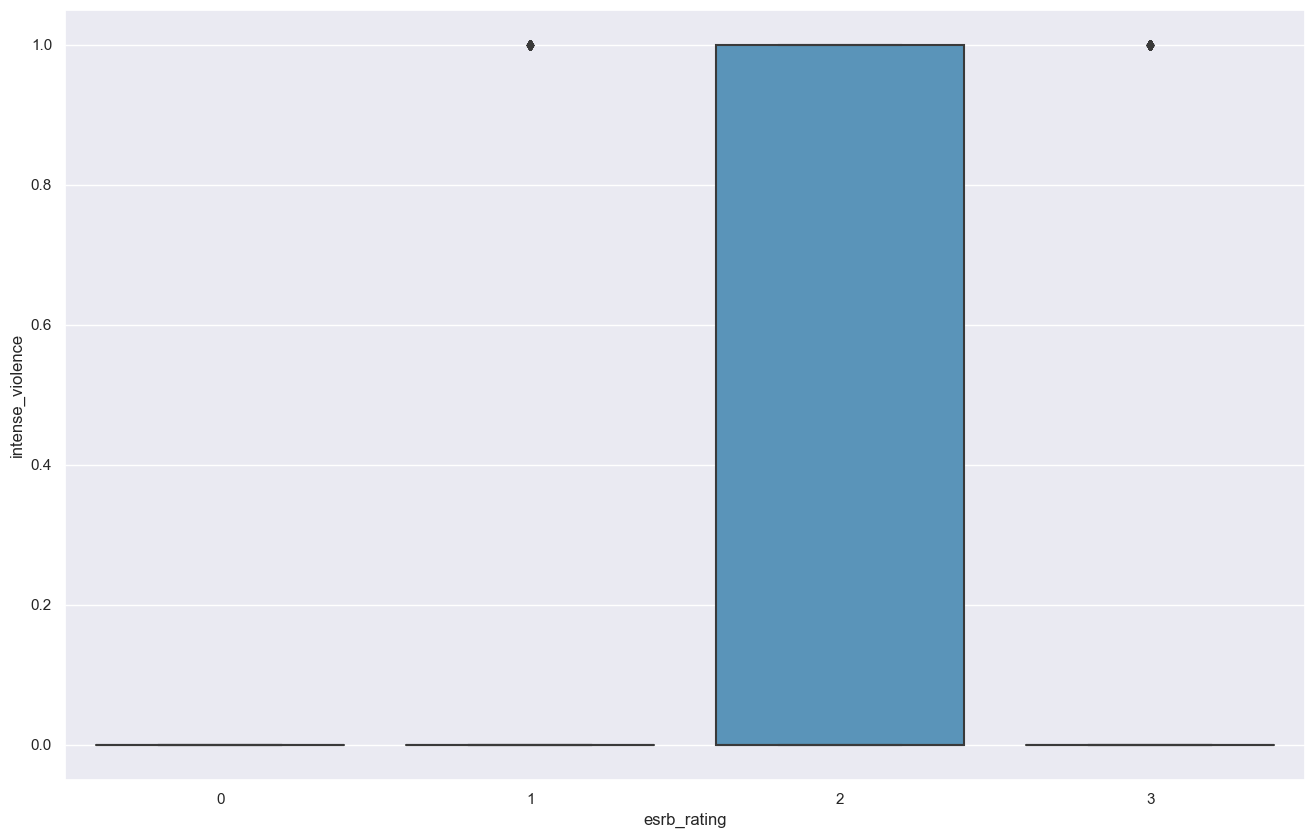

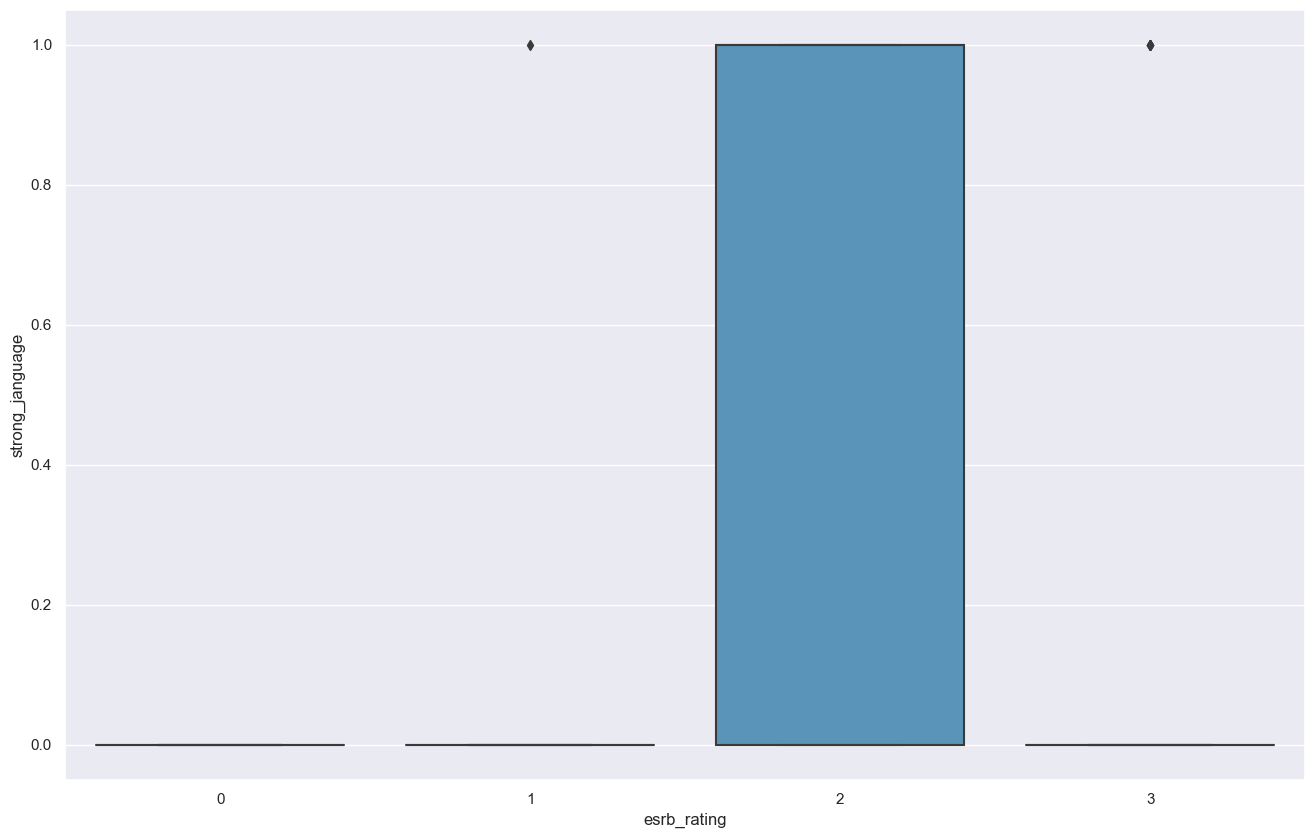

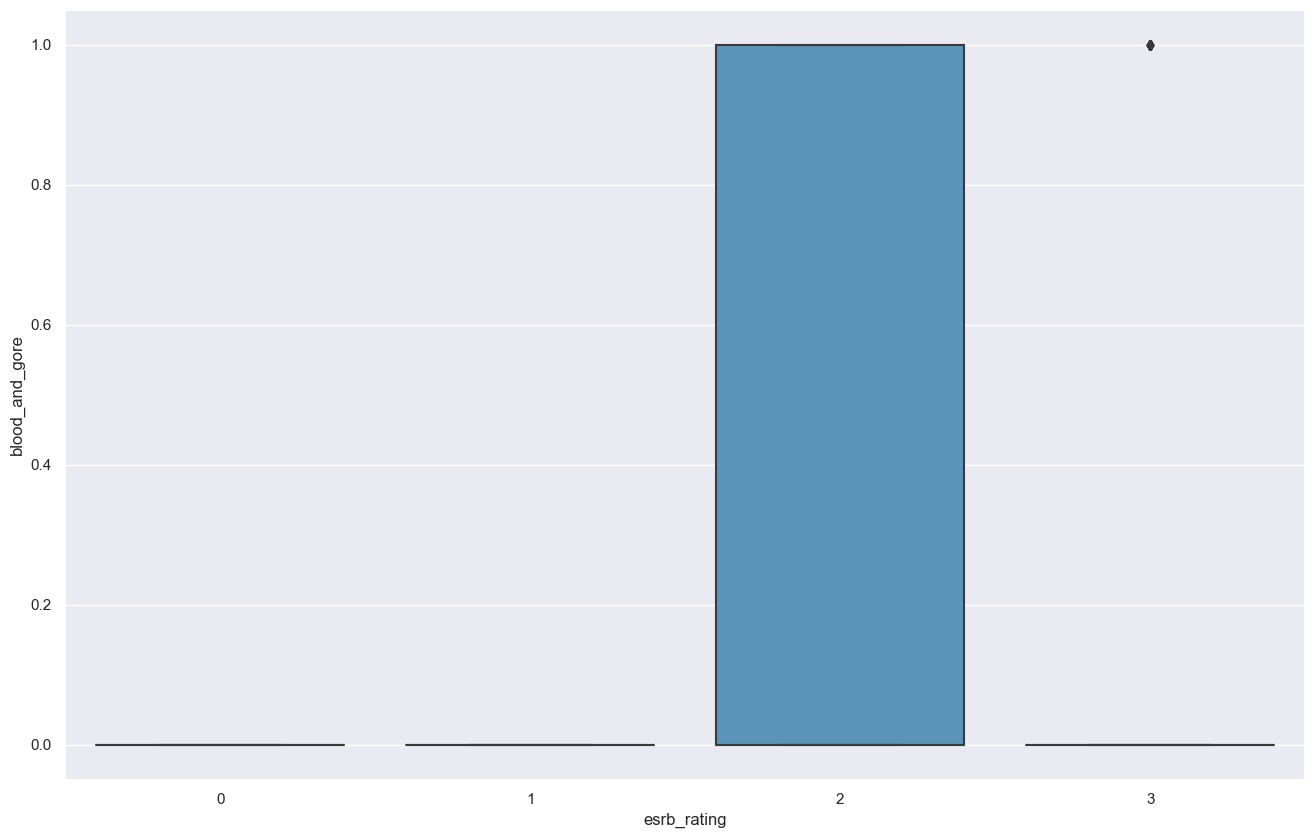

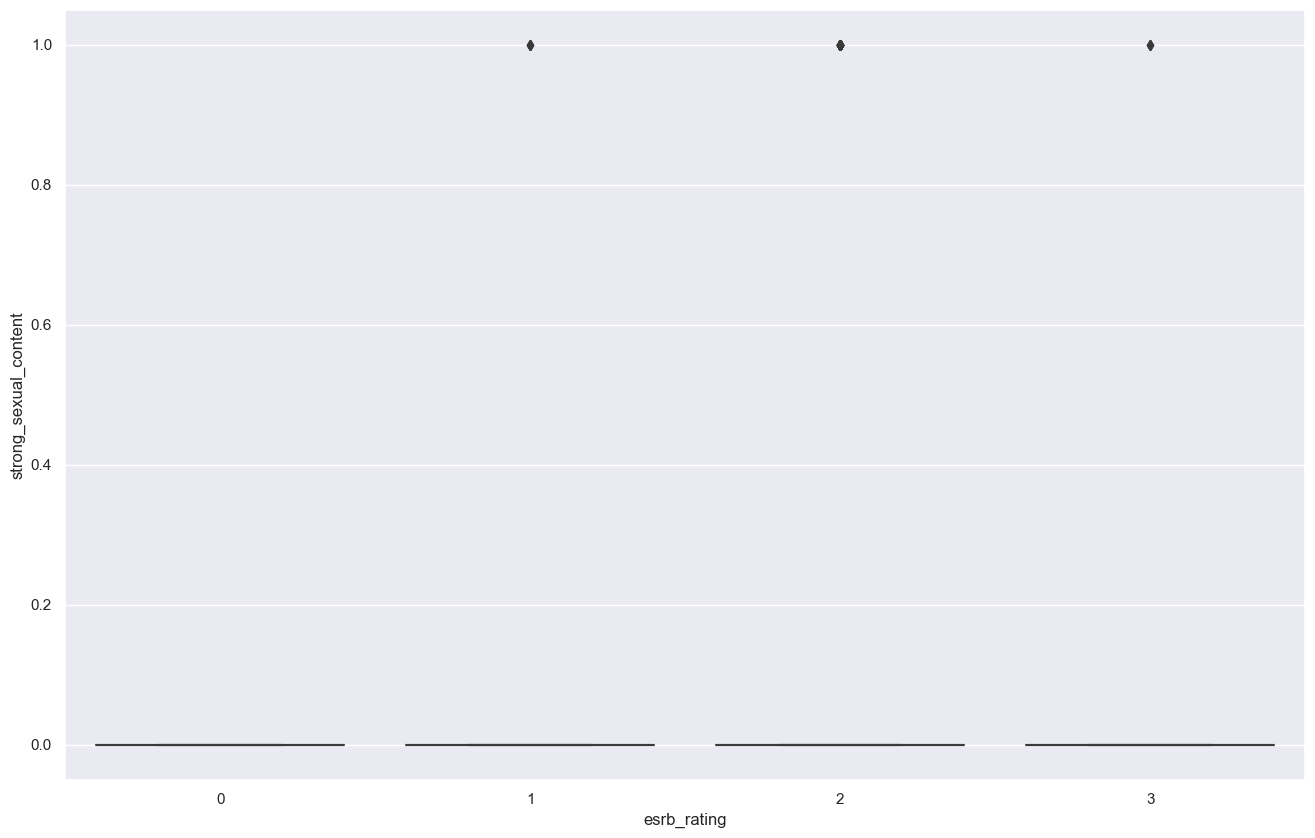

In [8]:
col = ["blood", "intense_violence", "strong_janguage", "blood_and_gore", "strong_sexual_content"]
sns.set(rc={'figure.figsize':(16,10)})
for item in col:
    sns.boxplot(x="esrb_rating", y=item, data=df, palette="Blues")
    plt.show()

#### Гістограми розподілу ознак відносно цільової змінної

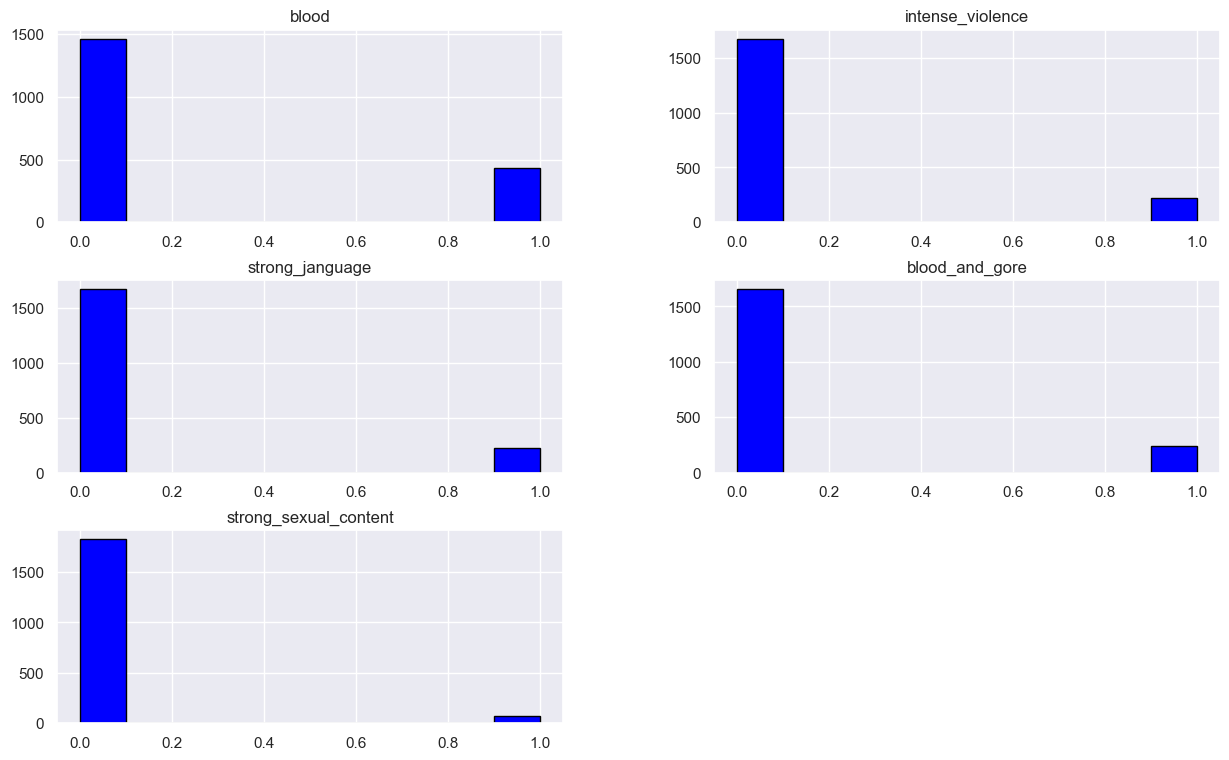

In [9]:
col = ["blood", "intense_violence", "strong_janguage", "blood_and_gore", "strong_sexual_content"]
df.loc[:,col].hist(color='blue', edgecolor='black', figsize=(15,9))
plt.show()

### Провести навчання наступних класифікаторів

#### kNN

In [10]:
trgt = ["esrb_rating"]      
dfprep = df.columns.drop(trgt)
train,test = train_test_split(df,test_size = 0.33,random_state= 12)
xTrain = train[dfprep]
yTrain = train[trgt]
xTest  = test[dfprep]
yTest = test[trgt]

In [11]:
param_grid ={'n_neighbors': [3,5,7,9,11]}
knnModel = KNeighborsClassifier()
grid_search=GridSearchCV(knnModel, param_grid,cv=5, return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("Best score:", grid_search.best_score_)
print("Best parameters:\n", grid_search.best_estimator_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Best score: 0.806931001213781
Best parameters:
 KNeighborsClassifier(n_neighbors=3)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
knnModel = KNeighborsClassifier(n_neighbors=11)
knnModel.fit(xTrain,yTrain.values.ravel())
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       127
           1       0.71      0.76      0.73       139
           2       0.95      0.82      0.88       129
           3       0.78      0.68      0.73       231

    accuracy                           0.79       626
   macro avg       0.80      0.81      0.80       626
weighted avg       0.80      0.79      0.79       626



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [13]:
param_grid ={'max_depth': [4, 6, 8, 10], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
dTree = DecisionTreeClassifier()
grid_search=GridSearchCV(dTree, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("Best score", grid_search.best_score_) 
print("Best parameters:\n", grid_search.best_estimator_)

Best score 0.5361396518045477
Best parameters:
 DecisionTreeClassifier(max_depth=10, max_features=9)


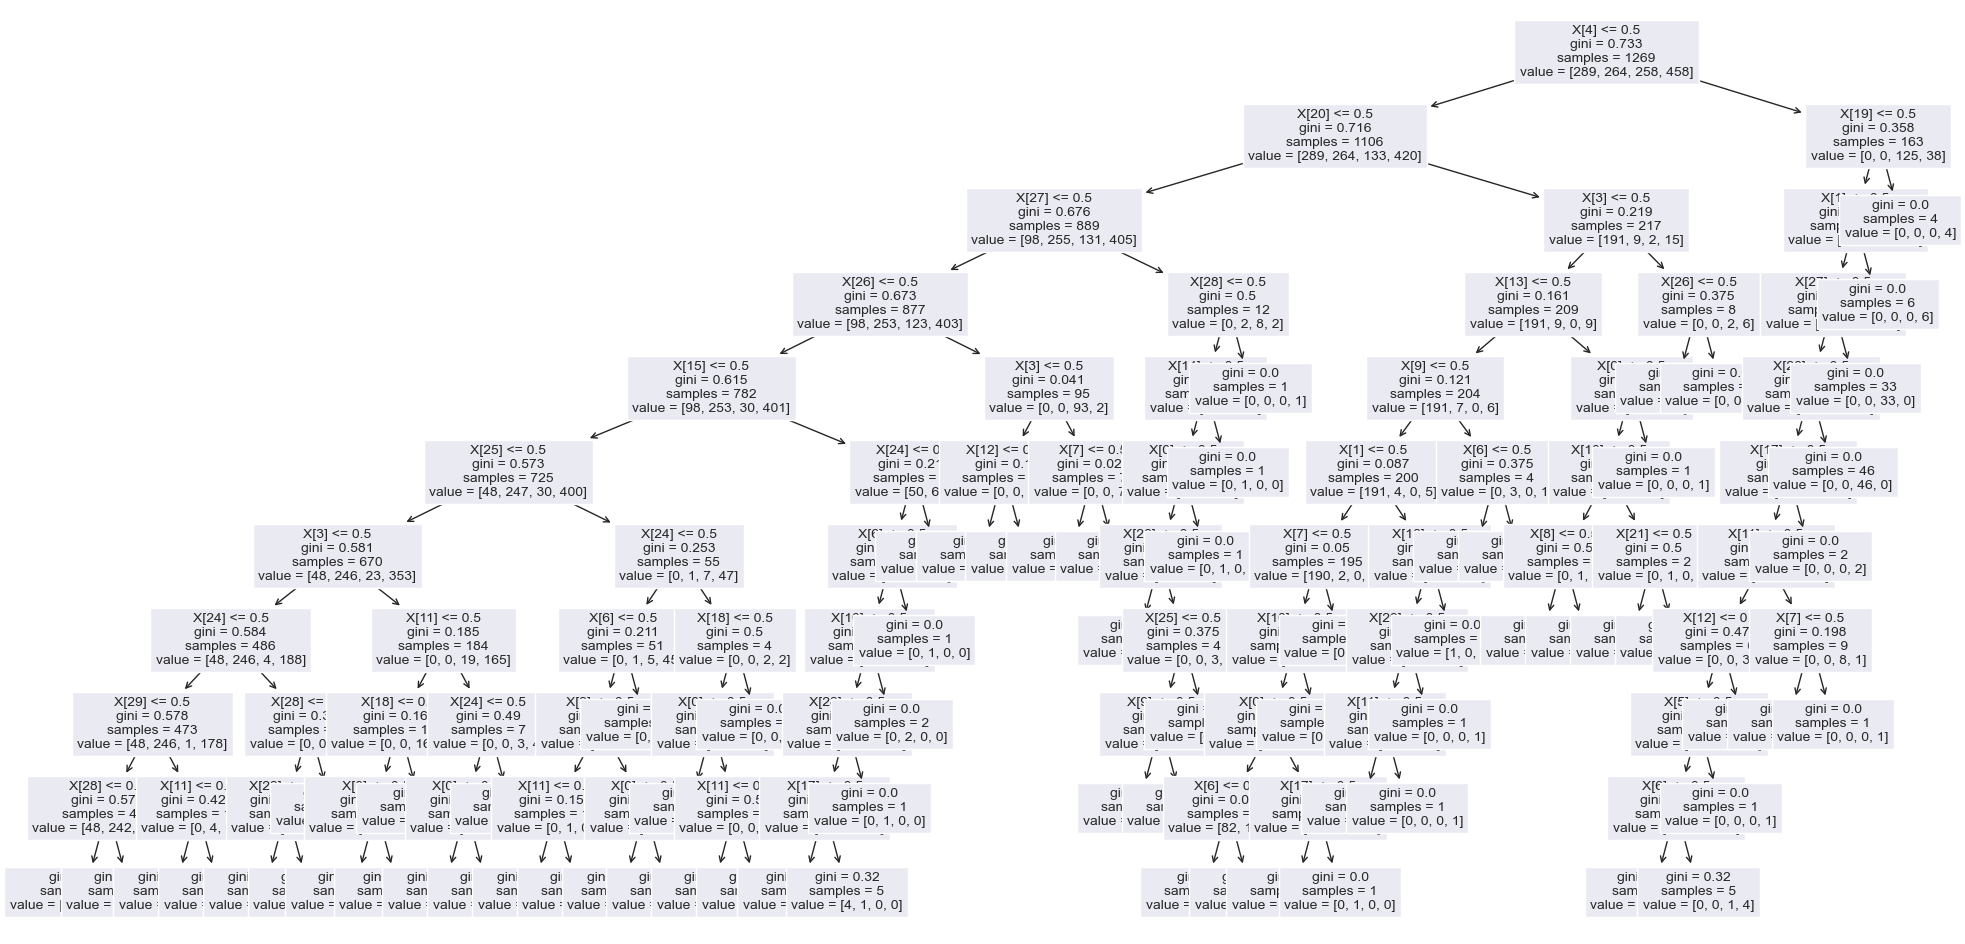

In [14]:
dTree = DecisionTreeClassifier(max_depth=10, max_features=8)   #бо дерево жадібне
dTree.fit(xTrain, yTrain)


plt.figure(figsize=(24,12))
plot_tree(dTree, fontsize=10)
plt.show()

In [15]:
yPred = dTree.predict(xTest)
print(classification_report(yTest,yPred))
yPred= dTree.predict(xTest)
accuracy_score(yTest,yPred)

              precision    recall  f1-score   support

           0       0.97      0.80      0.87       127
           1       0.54      0.83      0.66       139
           2       0.89      0.86      0.87       129
           3       0.82      0.65      0.72       231

    accuracy                           0.76       626
   macro avg       0.80      0.78      0.78       626
weighted avg       0.80      0.76      0.77       626



0.7635782747603834

#### SVC

In [16]:
param_grid = {'C': [0.1, 1, 10, 25],'gamma': [0.1, 0.05, 0.03, 0.07, 0.01]} 
SVC_clsfr = SVC(kernel='rbf')  
grid_search = GridSearchCV(SVC_clsfr, param_grid,return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)

print("Best score:", grid_search.best_score_) 
print("Best parameters:\n", grid_search.best_estimator_)

Best score: 0.8557810214434658
Best parameters:
 SVC(C=25, gamma=0.07)


In [17]:
SVC_clsfr = SVC(kernel='rbf', C=10, gamma=0.1)  
SVC_clsfr.fit(xTrain,yTrain.values.ravel()) 
yPred= SVC_clsfr.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       127
           1       0.83      0.81      0.82       139
           2       0.92      0.88      0.90       129
           3       0.83      0.85      0.84       231

    accuracy                           0.87       626
   macro avg       0.88      0.88      0.88       626
weighted avg       0.87      0.87      0.87       626



#### Random Forest

In [18]:
param_grid ={'max_depth': [4, 6, 8, 10, 12], 'n_estimators': [50, 100, 150, 200]} 
rForest = RandomForestClassifier()
grid_search=GridSearchCV(rForest, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("Best score:", grid_search.best_score_) 
print("Best parameters:\n", grid_search.best_estimator_)

Best score: 0.6098874688661564
Best parameters:
 RandomForestClassifier(max_depth=12)


In [19]:
rForest = RandomForestClassifier(n_estimators = 200, max_depth = 8)
rForest.fit(xTrain,yTrain.values.ravel())

yPred= rForest.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89       127
           1       0.81      0.73      0.77       139
           2       0.93      0.86      0.89       129
           3       0.74      0.84      0.79       231

    accuracy                           0.82       626
   macro avg       0.85      0.82      0.83       626
weighted avg       0.83      0.82      0.83       626



#### AdaBoost

In [ ]:
param_grid={'n_estimators':[500,1000,2000],'learning_rate':[0.001,0.01,0.1]}
AdaB = AdaBoostClassifier()
grid_search=GridSearchCV(AdaB, param_grid, cv=5,
                           scoring='r2', 
                           return_train_score=True,n_jobs=1)
grid_search.fit(xTrain, yTrain.values.ravel())
results = pd.DataFrame(grid_search.cv_results_)
print("Best score:", grid_search.best_score_) 
print("Best parameters:\n", grid_search.best_estimator_)

In [ ]:
AdaB = AdaBoostClassifier(n_estimators=1000, learning_rate=0.1)
AdaB.fit(xTrain,yTrain.values.ravel())

yPred= AdaB.predict(xTest)
accuracy_score(yTest,yPred)
print(classification_report(yTest,yPred))